[dataset NY] https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

 - Link do site onde encontra-se o dataset
 
 url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
# visualizando as 5 primeiras linhas do dataset
df[0:5]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222243929,12/25/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,40,0,25-44,M,BLACK,1007453,233952,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
1,222115778,12/22/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,33,0,18-24,M,BLACK HISPANIC,1001456,247485,40.845956,-73.937813,POINT (-73.93781267199995 40.84595574000008)
2,222090516,12/21/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,0,25-44,M,BLACK,1028605,187930,40.682398,-73.840079,POINT (-73.84007936899997 40.68239828900005)
3,221653577,12/10/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,103,0,18-24,M,BLACK,1039602,190480,40.689336,-73.800409,POINT (-73.80040882999998 40.68933550400004)
4,221599602,12/09/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,S,120,0,18-24,M,BLACK,949767,170539,40.634708,-74.124241,POINT (-74.12424111699994 40.634707811000055)


## 2- Preparaçao dos dados


 - Removendo as colunas que nao serão utilizadas 

In [4]:
select_ny=df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','New Georeferenced Column'], axis=1)

In [5]:
#  Renomeando as colunas

select_ny.columns = ['data_da_ocorrencia','descricao_da_ofensa','nivel_da_ofensa','bairro'
                     ,'idade_do_infrator','sexo_do_infrator','raca_do_infrator','latitude','longitude']

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]

date = select_ny['data_da_ocorrencia'].str.split("/", n = 3, expand = True)
select_ny['ano'] = date[2].astype('int32')
select_ny['dia'] = date[1].astype('int32')
select_ny['mes'] = date[0].astype('int32')
select_ny['dia_da_semana'] = select_ny['data_da_ocorrencia'].apply(date_to_weekday)

# alterando os dados da coluna nivel_da_ofensa

new_nivel_da_ofensa = {'M': "contravencao", 'F': "crime", 'V': "violacao",'I':"outro" }
select_ny['nivel_da_ofensa'] = select_ny['nivel_da_ofensa'].map(new_nivel_da_ofensa)

# alterando os dados da coluna bairro

new_bairro = {'B': 'Bronx', 'S': 'Staten_Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens' }
select_ny['bairro'] = select_ny['bairro'].map(new_bairro)

In [7]:
select_ny.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,12/25/2020,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,12/22/2020,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,12/21/2020,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,12/10/2020,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,12/09/2020,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


In [8]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   140413 non-null  object 
 1   descricao_da_ofensa  140376 non-null  object 
 2   nivel_da_ofensa      139024 non-null  object 
 3   bairro               140413 non-null  object 
 4   idade_do_infrator    140413 non-null  object 
 5   sexo_do_infrator     140413 non-null  object 
 6   raca_do_infrator     140413 non-null  object 
 7   latitude             140413 non-null  float64
 8   longitude            140413 non-null  float64
 9   ano                  140413 non-null  int32  
 10  dia                  140413 non-null  int32  
 11  mes                  140413 non-null  int32  
 12  dia_da_semana        140413 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 12.3+ MB


 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [9]:
select_ny["data_da_ocorrencia"] = pd.to_datetime(select_ny["data_da_ocorrencia"] )

## 3.0 Selecinando apenas os crimes com maiores incidencias.
 
  - Baseado no DataFrame criado anteriormente "tipos_de_delitos" , selecinamos os 15 tipos mais recorrentes.

In [10]:
select_ny = select_ny.query('descricao_da_ofensa =="ASSAULT 3 & RELATED OFFENSES" or  descricao_da_ofensa =="FELONY ASSAULT" or descricao_da_ofensa =="PETIT LARCENY" or descricao_da_ofensa =="DANGEROUS DRUGS" or descricao_da_ofensa =="MISCELLANEOUS PENAL LAW" or descricao_da_ofensa =="ROBBERY" or descricao_da_ofensa =="CRIMINAL MISCHIEF & RELATED OF" or descricao_da_ofensa =="BURGLARY" or  descricao_da_ofensa =="GRAND LARCENY" or descricao_da_ofensa =="DANGEROUS WEAPONS" or  descricao_da_ofensa =="OFFENSES AGAINST PUBLIC ADMINI" or descricao_da_ofensa =="VEHICLE AND TRAFFIC LAWS" or  descricao_da_ofensa =="OFF. AGNST PUB ORD SENSBLTY &" or descricao_da_ofensa =="SEX CRIMES" or descricao_da_ofensa =="INTOXICATED & IMPAIRED DRIVING"  ')

In [11]:
select_ny = select_ny.dropna()

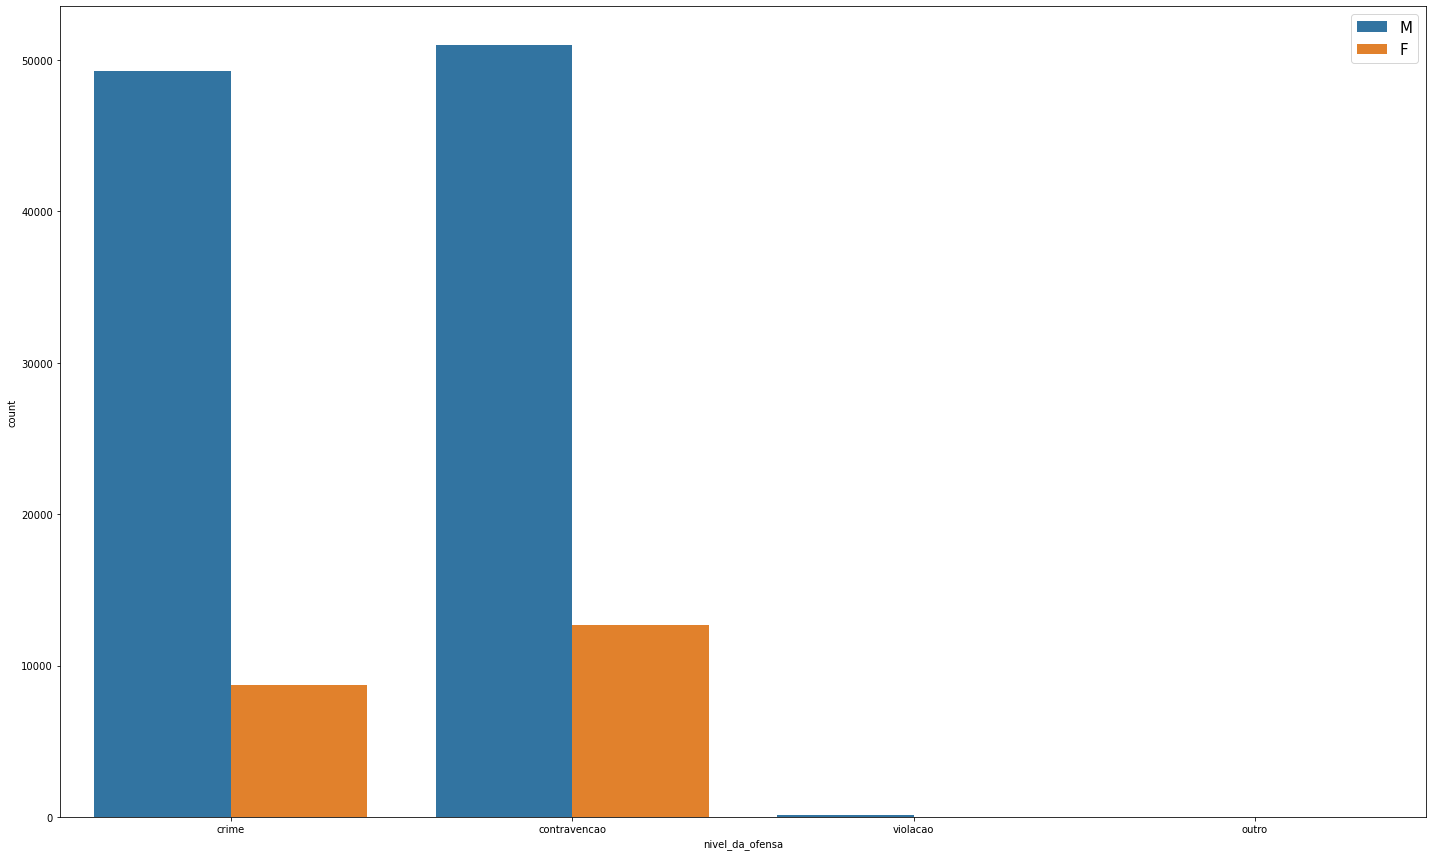

In [12]:
plt.figure(figsize=(20,12))
sns.countplot(x='nivel_da_ofensa' , hue='sexo_do_infrator' , data = select_ny)
plt.legend(fontsize=15,loc=1)
plt.tight_layout()
plt.show()

# 4 - Modelagem

## 4.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes


## Criando um modelo de classificacao pra definir se quem praticou o delito era do sexo masculino ou femino .

 - Exculuindo colunas que não serão utilizadas

In [13]:
dados = select_ny.drop(columns=['ano'])

 - Convertendo variáveis categóricas em variáveis numéricas

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
enconder = LabelEncoder()

In [16]:
dados['data_da_ocorrencia'] = enconder.fit_transform(dados['data_da_ocorrencia'])
dados['nivel_da_ofensa'] = enconder.fit_transform(dados['nivel_da_ofensa'])
dados['idade_do_infrator'] = enconder.fit_transform(dados['idade_do_infrator'])
dados['descricao_da_ofensa'] = enconder.fit_transform(dados['descricao_da_ofensa'])
dados['bairro'] = enconder.fit_transform(dados['bairro'])
dados['sexo_do_infrator'] = enconder.fit_transform(dados['sexo_do_infrator'])
dados['raca_do_infrator'] = enconder.fit_transform(dados['raca_do_infrator'])
dados['mes'] = enconder.fit_transform(dados['mes'])
dados['dia'] = enconder.fit_transform(dados['dia'])
dados['dia_da_semana'] = enconder.fit_transform(dados['dia_da_semana'])
dados['latitude'] = enconder.fit_transform(dados['latitude'])
dados['longitude'] = enconder.fit_transform(dados['longitude'])

In [17]:
dados.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,dia,mes,dia_da_semana
0,359,5,1,0,1,1,2,21676,14591,24,11,0
1,356,12,1,2,0,1,3,25320,11290,21,11,5
2,355,5,1,3,1,1,2,9948,23690,20,11,1
3,344,5,1,3,0,1,2,10970,25703,9,11,4
8,326,5,1,0,1,1,2,27383,20640,21,10,3


Separando as variaveis em X e Y

In [18]:
X = dados.drop('sexo_do_infrator',axis=1).values
Y = dados['sexo_do_infrator'].values


Separando em amostras de treino e teste

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 , stratify = Y)

Aplicando o modelo da arvore de decisão

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [22]:
dte = DecisionTreeClassifier()

In [23]:
dte.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

Ajustando o modelo

In [24]:
dte.fit(X_treino,Y_treino)

DecisionTreeClassifier()

Determinando acurácia na amostra de treino

In [25]:
score_treino = dte.score(X_treino,Y_treino)

In [26]:
score_treino

0.9908098101716452

Realizando previsão na amostra de teste

In [27]:
Y_pred = dte.predict(X_teste)

In [28]:
score_teste = dte.score(X_teste,Y_teste)

In [29]:
score_teste

0.7356401156677181

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_pred))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29      5339
           1       0.85      0.83      0.84     25093

    accuracy                           0.74     30432
   macro avg       0.56      0.57      0.56     30432
weighted avg       0.75      0.74      0.74     30432



Gerando matriz de confusão para comparar os resultados

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(Y_teste,Y_pred)

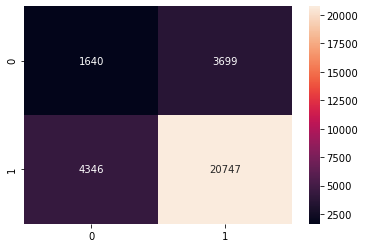

In [33]:
sns.heatmap(cm, annot=True , fmt='g')

In [34]:
from sklearn.metrics import roc_auc_score

In [36]:
y_proba = dte.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.5683899758789792

Alem do score na amostra de teste não estar adequado, devemos notar que muitos casos negativos foram classificados como positivo. Isto pode ser corrigido.

 -  Repetindo com validação cruzada

In [37]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()    
    print("Accuracy médio: %.2f " % (media * 100 ))
    print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2*desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

SEED = 5
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle =True)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, X, Y, cv = cv, return_train_score= False)
imprime_resultados(results)

Accuracy médio: 82.46 
Accuracy intervalo: [82.45, 82.46]


 - Ajustando o o novo modelo

In [39]:
modelo.fit(X_treino, Y_treino)

DecisionTreeClassifier(max_depth=2)

 - Fazendo a previsão prra amostra de teste

In [40]:
Y_previsto = modelo.predict(X_teste)

 - Novo score da amostra de teste 

In [41]:
new_score_teste = modelo.score(X_teste,Y_teste)

In [42]:
new_score_teste

0.8245596740273397

 - Gerando uma ova matrz de confusão

In [43]:
cm_nova=confusion_matrix(Y_teste,Y_previsto)

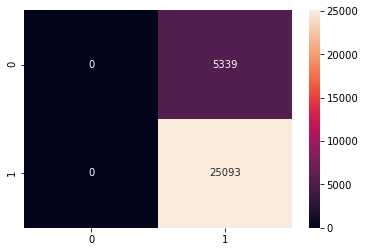

In [44]:
sns.heatmap(cm_nova, annot=True , fmt='g')

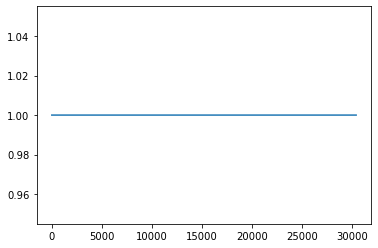

In [45]:
sns.lineplot(range(len(Y_previsto)), Y_previsto)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_previsto))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5339
           1       0.82      1.00      0.90     25093

    accuracy                           0.82     30432
   macro avg       0.41      0.50      0.45     30432
weighted avg       0.68      0.82      0.75     30432



C:\Users\Biena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparando roc_auc_score

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score


In [48]:
#  antes cross_validate
roc_score = roc_auc_score(Y_teste, Y_pred)
print("ROC score = {:0.2f}%".format(roc_score*100))

ROC score = 56.70%


In [49]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_pred)

Text(0, 0.5, 'True Positive Rate')

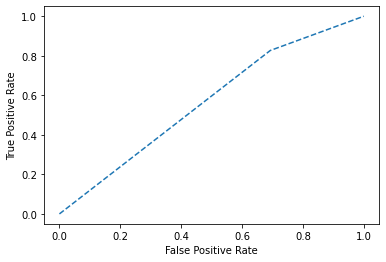

In [50]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [51]:
# apos cross_validate
new_roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(new_roc_score*100))

ROC score = 50.00%


In [52]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

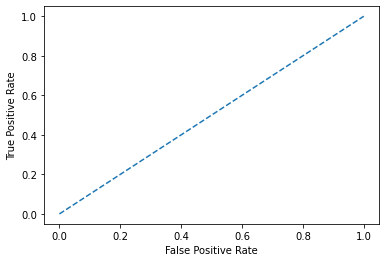

In [53]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

 - Criando um GridSearch

In [54]:
# critérios para medir a qualidade da divisão dos dados
criterion=['gini','entropy']
max_depth = np.arange(2,10)
max_features= np.arange(2,10)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parametros = {'criterion' : criterion, 'max_depth' : max_depth, 'max_features' : max_features}

In [57]:
melhor_modelo = GridSearchCV(modelo, parametros, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

In [58]:
melhor_modelo.fit(X_treino, Y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [59]:
modelo_final = melhor_modelo.best_estimator_

In [60]:
modelo_final

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [61]:
Y_previsto_ajustado = modelo_final.predict(X_teste)

In [62]:
cm_nova=confusion_matrix(Y_teste,Y_previsto_ajustado)

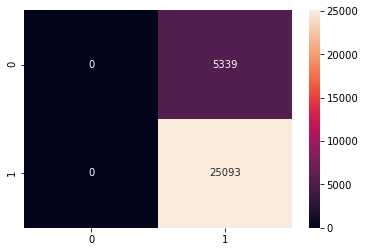

In [63]:
sns.heatmap(cm_nova, annot=True , fmt='g')

In [64]:
score_teste = modelo_final.score(X_teste,Y_teste)

In [65]:
score_teste

0.8245596740273397

In [66]:
print(classification_report(Y_teste, Y_previsto))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5339
           1       0.82      1.00      0.90     25093

    accuracy                           0.82     30432
   macro avg       0.41      0.50      0.45     30432
weighted avg       0.68      0.82      0.75     30432



C:\Users\Biena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(roc_score*100))

ROC score = 50.00%


In [69]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

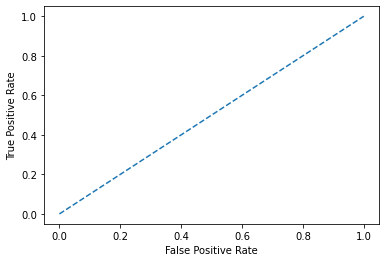

In [70]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')